# Семинар 16

## Введение в нейронные сети

![](images/stack-more-layers.png)

## А зачем вообще это все?

![](images/xor.png)

Source: CMU DL course

![image.png](images/decision-boundaries.png)

![image.png](images/decision-boundaries2.png)

## А как это обучать?

![image.png](images/backprop.jpg)

### Backpropagation

* forward-шаг - проходим по сети от входов к выходам, запоминаем значения в нейронах
* backward-шаг - проходим по сети от выходов к входам, считаем градиенты функции потерь по весам, обновляем веса

и так далее...

## Практика

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

%matplotlib inline

Будем работать с данными MNIST. Будем по картинке предсказывать наиболее вероятную цифру - на выходном слое сети будет десять нейронов с вероятностями, соответствующих цифрам.

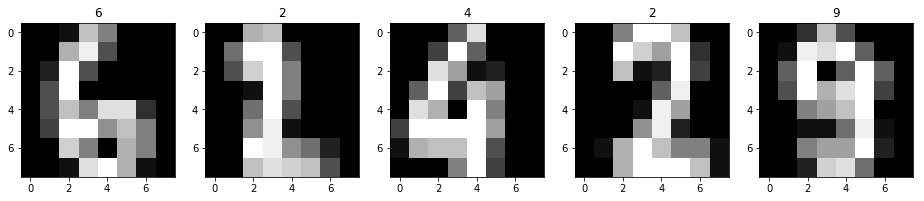

In [2]:
digits = load_digits()
X = digits.images / 255
y = digits.target

idx = np.random.randint(len(X), size=5)
fig, ax = plt.subplots(1, 5, figsize=(16, 8))
for i in range(5):
    ax[i].imshow(X[idx[i]], cmap='gray')
    ax[i].set_title(y[idx[i]])
plt.show()

In [3]:
class Layer:
    """
    A building block. Each layer is capable of performing two things:
    
    - Process input to get output:           output = layer.forward(input)
    
    - Propagate gradients through itself:    grad_input = layer.backward(input, grad_output)
    
    Some layers also have learnable parameters which they update during layer.backward.
    """
    def __init__(self):
        """Here you can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [1, input_units], returns output data [1, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        """
        Performs a backpropagation step through the layer, with respect to the given input.
        
        To compute loss gradients w.r.t input, you need to apply chain rule (backprop):
        
        d loss / d x  = (d loss / d layer) * (d layer / d x)
        
        Luckily, you already receive d loss / d layer as input (grad output), so you only need to multiply it by d layer / d x.
        
        If your layer has parameters (e.g. dense layer), you also need to update them here using d loss / d layer
        """
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

![image.png](images/activation-functions.png)

In [4]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [1, input_units] matrix"""
        output = # ¯\_(ツ)_/¯
        return output
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = # ¯\_(ツ)_/¯
        return grad_output * relu_grad


## Полносвязный слой

![image.png](images/neural-network.png)

Далее для простоты будем считать, что в сеть приходит один объект (обычно это не так, и их приходить может сколько вы захотите).

Предположим, нейрон на выходе один. Тогда если на входе в слой находился вектор $x \in \mathbb{R}^{1 \times n}$, соответствующий признаковому описанию одного объекта, то на выходе будет:

$$
z = xw + b \in \mathbb{R},
$$

где $w \in \mathbb{R}^{n \times 1}$ и $b \in \mathbb{R}$.

А если нейронов на выходе несколько (k > 1)?

$$
z = xW + b \in \mathbb{R}^{1 \times k},
$$

где $W \in \mathbb{R}^{n \times k}$ и $b \in \mathbb{R}^{1 \times k}$.

Аккуратно посчитаем производные (для backward-шага). Нам нужно посчитать: $\frac{\partial L}{\partial x}$, $\frac{\partial L}{\partial W}$, $\frac{\partial L}{\partial b}$.

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z}\frac{\partial z}{\partial x}
$$

Заметим, что $z_j = \sum\limits_i x_iw_{ij} + b_j$, поэтому $\frac{\partial z_j}{\partial x_i} = w_{ij}$. Отсюда:

$$
\frac{\partial z}{\partial x} = \begin{pmatrix}\frac{\partial z_1}{\partial x_1}&\cdots&\frac{\partial z_1}{\partial x_n}\\\vdots&\ddots&\vdots\\\frac{\partial z_k}{\partial x_1}&\cdots&\frac{\partial z_k}{\partial x_n}\end{pmatrix} = \begin{pmatrix}w_{11}&\cdots&w_{n1}\\\vdots&\ddots&\vdots\\w_{1k}&\cdots&w_{nk}\end{pmatrix} = W^T
$$

Итак:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z}W^T
$$

Перейдем к производным по весам:

$$
\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial z_j}\frac{\partial z_j}{\partial w_{ij}} = \frac{\partial L}{\partial z_j}x_i
$$

Отсюда:

$$
\frac{\partial L}{\partial W} = \begin{pmatrix}\frac{\partial L}{\partial w_{11}}&\cdots&\frac{\partial L}{\partial w_{1k}}\\\vdots&\ddots&\vdots\\\frac{\partial L}{\partial w_{n1}}&\cdots&\frac{\partial L}{\partial w_{nk}}\end{pmatrix} = \begin{pmatrix}\frac{\partial L}{\partial z_1}x_1&\cdots&\frac{\partial L}{\partial z_k}x_1\\\vdots&\ddots&\vdots\\\frac{\partial L}{\partial z_1}x_n&\cdots&\frac{\partial L}{\partial z_k}x_n\end{pmatrix} = \begin{pmatrix}x_1\\\vdots\\x_n\end{pmatrix} \begin{pmatrix}\frac{\partial L}{\partial z_1}&\cdots&\frac{\partial L}{\partial z_k}\end{pmatrix} = x^T\frac{\partial L}{\partial z}
$$

Наконец, производная по bias:

$$
\frac{\partial L}{\partial b_j} = \frac{\partial L}{\partial z_j}\frac{\partial z_j}{\partial b_j} = \frac{\partial L}{\partial z_j}
$$

Следовательно:

$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial z}
$$

In [5]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.05):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = <x*W> + b
        """
        self.learning_rate = learning_rate
        
        # initialize weights with small random numbers. We use normal initialization, 
        # but surely there is something better. Try this once you got it working: http://bit.ly/2vTlmaJ
        self.weights = np.random.randn(input_units, output_units)*0.01
        self.biases = np.zeros((1, output_units))
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <x*W> + b
        
        input shape: [1, input_units]
        output shape: [1, output units]
        """
        return # ¯\_(ツ)_/¯
    
    def backward(self, input, grad_output):
        
        # compute d f / d x = d f / d y * d y / d x
        grad_input = # ¯\_(ツ)_/¯
        
        # df / dw =  dy / dw * df / dy
        # df / db =  dy / db * df / dy
        
        # compute gradient w.r.t. weights and biases
        grad_weights = # ¯\_(ツ)_/¯
        grad_biases = # ¯\_(ツ)_/¯
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        # Here we perform a stochastic gradient descent step. 
        # Later on, you can try replacing that with something better.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

### Функция потерь

Кросс-энтропия:

$$
L(y, p) = -\sum_j y_j \log p_j = -[y_i = 1] \log p_i
$$

Заметим, что для вычисления вероятностей в последнем слое в качестве функции активации используется софтмакс:

$$
p_i = \frac{e^{x_i}}{\sum\limits_{j}e^{x_j}}
$$

Подставим это в функцию потерь:

$$
L(y, p) = -[y_i = 1] \log \frac{e^{x_i}}{\sum\limits_{j}e^{x_j}} = -[y_i = 1]x_i + \log\sum\limits_{j}e^{x_j}
$$

Эта функция потерь называется log-softmax и часто используется вместо того, чтобы посчитать вероятности и затем посчитать кросс-энтропию, в силу ее численных особенностей.

Нетрудно посчитать ее производную:

$$
\frac{\partial L}{\partial x} = -y_{oh} + \frac{e^x}{\sum_j e^{x_j}},
$$

где $y_{oh}$ - one-hot вектор $(0, ..., y_i = 1, ..., 0)$.

In [6]:
def softmax_crossentropy_with_logits(logits, answer):
    """Compute crossentropy from logits[1, n_classes] and ids of correct answers"""
    logits_for_answers = logits[0, answer]
    
    xentropy = -logits_for_answers + np.log(np.exp(logits).sum())
    
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, answer):
    """Compute crossentropy gradient from logits[1, n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[0, answer] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum()
    
    return -ones_for_answers + softmax

Создадим архитектуру сети.

In [7]:
# векторизуем картинки
X_flat = X.reshape(X.shape[0], -1)
X_train, X_val, y_train, y_val = train_test_split(X_flat, y, test_size=0.25, random_state=13)

network = []
network.append(Dense(X_train.shape[1], 32))
network.append(ReLU())
network.append(Dense(32, 10))

Функции для обучения сети и предсказания.

In [8]:
def forward(network, X):
    """
    Compute activations of all network layers by applying them sequentially.
    Return a list of activations for each layer. 
    Make sure last activation corresponds to network logits.
    """
    activations = []
    input = X.copy()
    for layer in network:
        input = layer.forward(input)
        activations += [input]
    
    assert len(activations) == len(network)
    return activations

def predict(network, X):
    """
    Use network to predict the most likely class for each sample.
    """
    logits = forward(network, X)[-1]
    return logits.argmax(axis=-1)

In [9]:
def train(network,X,y):
    """
    Train your network on a given batch of X and y.
    You first need to run forward to get all layer activations.
    You can estimate loss and loss_grad, obtaining dL / dy_pred
    Then you can run layer.backward going from last layer to first, 
    propagating the gradient of input to previous layers.
    
    After you called backward for all layers, all Dense layers have already made one gradient step.
    """
    
    # Get the layer activations
    layer_activations = forward(network,X)
    layer_inputs = [X] + layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
    
    # propagate gradients through network layers using .backward
    # hint: start from last layer and move to earlier layers
    grad_output = loss_grad
    for layer, layer_input in zip(reversed(network), reversed(layer_inputs[:-1])):
        grad_output = layer.backward(layer_input, grad_output)
    return np.mean(loss)

In [10]:
def iterate_minibatches(inputs, targets, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for batch_idx in range(int(len(inputs))):
        if shuffle:
            excerpt = indices[batch_idx]
        else:
            excerpt = batch_idx
        yield inputs[excerpt].reshape(1, -1), targets[excerpt]

In [11]:
from IPython.display import clear_output
train_log = []
val_log = []

Epoch 99
Train accuracy: 0.9821826280623608
Val accuracy: 0.9444444444444444


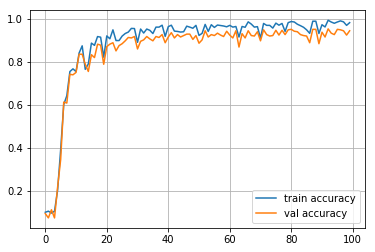

In [12]:
for epoch in range(100):

    for x_batch, y_batch in iterate_minibatches(X_train, y_train, shuffle=True):
        train(network, x_batch, y_batch)
    
    train_correct = 0
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, shuffle=False):
        y_pred = predict(network, x_batch)
        if y_pred == y_batch:
            train_correct += 1
    
    val_correct = 0
    for x_batch, y_batch in iterate_minibatches(X_val, y_val, shuffle=False):
        y_pred = predict(network, x_batch)
        if y_pred == y_batch:
            val_correct += 1

    train_log.append(train_correct / len(y_train))
    val_log.append(val_correct / len(y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    

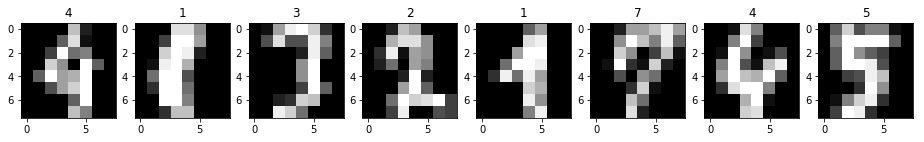

In [13]:
idx = np.random.randint(len(X_val), size=8)
fig, ax = plt.subplots(1, 8, figsize=(16, 8))
for i in range(8):
    x_batch = X_val[idx[i]]
    ax[i].imshow(x_batch.reshape(8, 8), cmap='gray')
    ax[i].set_title(predict(network, x_batch)[0])
plt.show()